In [72]:
#all imports for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df  = pd.read_csv('cleaner_transformed_data_Rachael.csv')

In [74]:
# print columns title, text, id, order, likes, viewCount, commentsCount
subdf = df[['title', 'text', 'id', 'likes', 'viewCount', 'commentsCount', 'duration in seconds']]

# remove rows with NaN values
# subdf = subdf.dropna()
# print rows with 'ad' as a substring in the 'title' column or in the 'text' column
# DataFrame for rows where 'title' contains 'ad'
subdf['hasAdinTitle'] = subdf['title'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)
subdf['hasAdinText'] = subdf['text'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)

subdf_stats = subdf.groupby(['hasAdinTitle', 'hasAdinText'])[['viewCount', 'likes', 'commentsCount']].agg(['mean', 'median', 'count'])
subdf_stats

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1237355612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinTitle'] = subdf['title'].str.lower().str.contains('ad|sponsored|collaboration|promo|partner|affiliate|paid|gift', case=False, na=False).astype(int)
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1237355612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinText'] = subdf['text'].str.lower().str.contains('ad|sponsored|collaboration|prom

viewCount                        likes         \
                                   mean  median  count          mean median   
hasAdinTitle hasAdinText                                                      
0            0            402852.238819  9255.0  13550  21753.958967  463.5   
             1             98008.816356  1513.0   2091   5011.094692   47.0   
1            0            515593.407742  8161.0   1550  27786.274194  384.0   
             1             53963.937349  2735.0    415   3098.616867  112.0   

                                commentsCount                
                          count          mean median  count  
hasAdinTitle hasAdinText                                     
0            0            13550    148.521328    9.0  13550  
             1             2091     39.548541    3.0   2091  
1            0             1550    110.826452    6.0   1550  
             1              415     21.891566    3.0    415

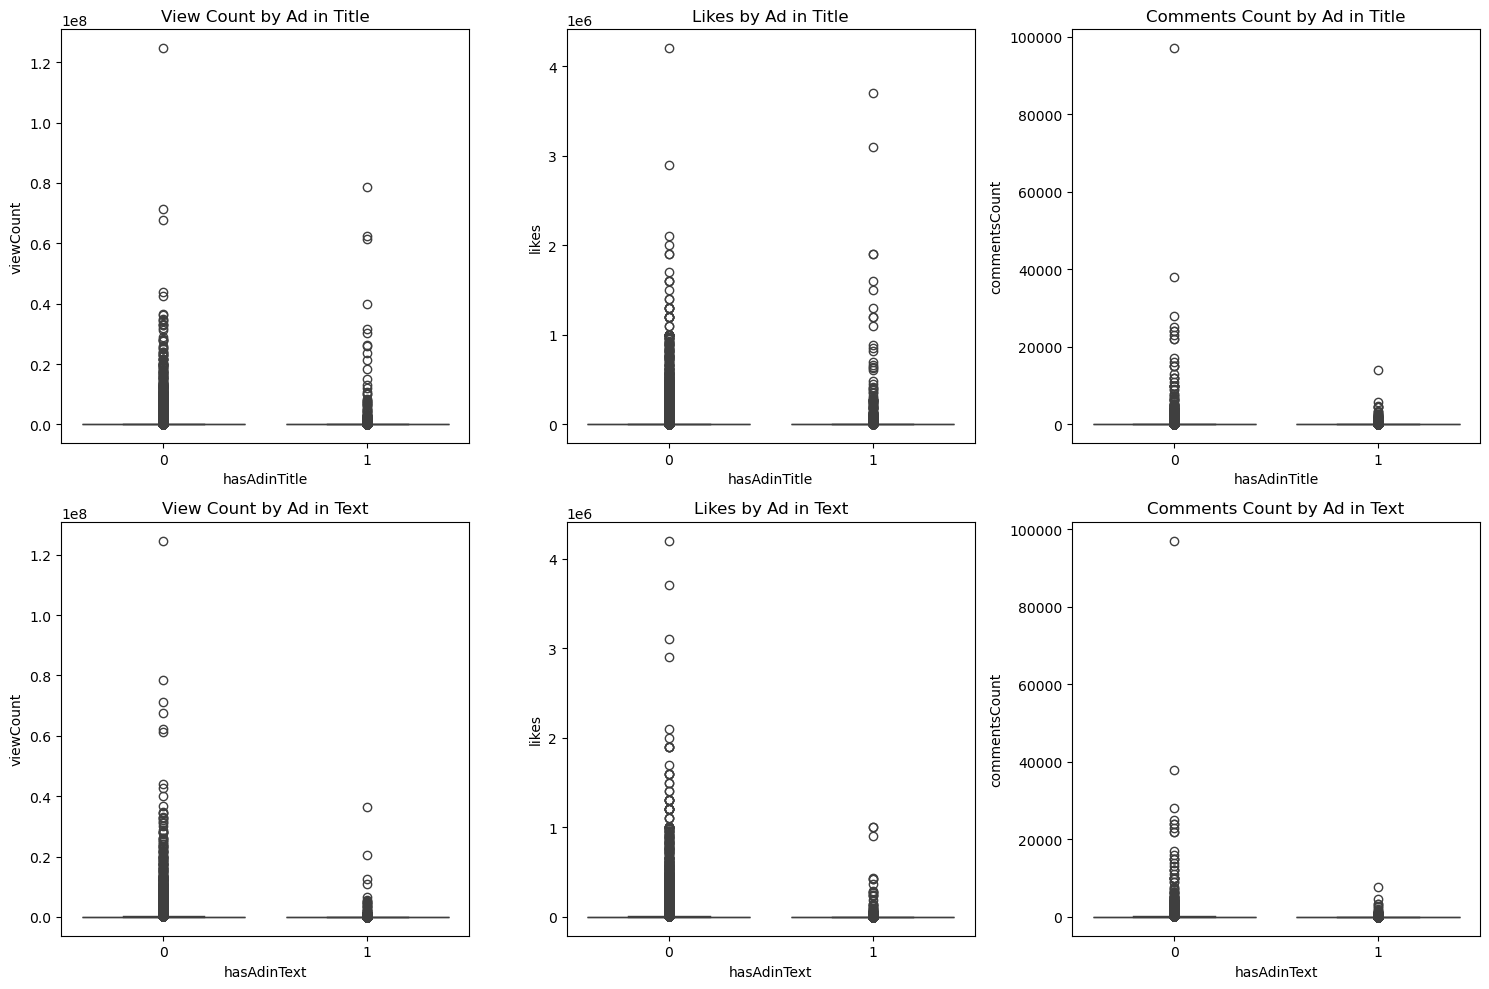

In [76]:
_, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot for hasadintitle
sns.boxplot(x='hasAdinTitle', y='viewCount', data=subdf, ax=axes[0, 0])
sns.boxplot(x='hasAdinTitle', y='likes', data=subdf, ax=axes[0, 1])
sns.boxplot(x='hasAdinTitle', y='commentsCount', data=subdf, ax=axes[0, 2])
axes[0, 0].set_title('View Count by Ad in Title')
axes[0, 1].set_title('Likes by Ad in Title')
axes[0, 2].set_title('Comments Count by Ad in Title')

# plot for hasadintext
sns.boxplot(x='hasAdinText', y='viewCount', data=subdf, ax=axes[1, 0])
sns.boxplot(x='hasAdinText', y='likes', data=subdf, ax=axes[1, 1])
sns.boxplot(x='hasAdinText', y='commentsCount', data=subdf, ax=axes[1, 2])
axes[1, 0].set_title('View Count by Ad in Text')
axes[1, 1].set_title('Likes by Ad in Text')
axes[1, 2].set_title('Comments Count by Ad in Text')

plt.tight_layout()
plt.show()


In [ ]:
df_corr = subdf[['viewCount', 'likes', 'commentsCount', 'hasAdinTitle', 'hasAdinText']]

corr_matrix = df_corr.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# perform a t-test
from scipy import stats
# t-test for viewCount
metrics = ['viewCount', 'likes', 'commentsCount']
for metric in metrics:
    t_stat, p_value = stats.ttest_ind(subdf.loc[subdf['hasAdinTitle'] == 1, metric], subdf.loc[subdf['hasAdinTitle'] == 0, metric], equal_var=False)
    print(f'T-test for {metric}: t-statistic = {t_stat}, p-value = {p_value}')
    t_stat_text, p_value_text = stats.ttest_ind(subdf.loc[subdf['hasAdinText'] == 1, metric], subdf.loc[subdf['hasAdinText'] == 0, metric], equal_var=False)
    print(f'T-test for {metric} by Ad in Text: t-statistic = {t_stat_text}, p-value = {p_value_text}')


### Engagement on videos with ads vs without ads
- When the title of a video contains any hashtag related to ads, the views and likes don't differ compared to video with titles not containing ads
- One key difference is in the number of comments that are left on videos with title containing hashtags related to ads. The comments drop significantly
- When the text of a video contains any hashtag related to ads, all metrics of engagement drop significantly.

This suggests that title of a video containing the information of it being an ad doesn't affect viewership or likability of the video but people participate less actively, i.e., they tend to not leave comments on such videos

It also suggests that the text of a video containing ad related hashtags negatively affects engagement, suggesting people are averse to promotional content.

From this we can also say that the title is of less importance when it comes to engagement with a ad video or otherwise.

In [ ]:
#get a list of all unique hashtags from title column and text column
hashtags = df['title'].str.extractall(r'#(\w+)')[0].value_counts()
hashtags.to_csv('unique_hashtags_in_title.csv')
hashtags = df['text'].str.extractall(r'#(\w+)')[0].value_counts()
hashtags.to_csv('unique_hashtags_in_text.csv')

In [81]:
# Filter out videos from before 15 October 2024
filtered_df = df[df['datetime date'] >= '2024-10-15']

# Create subdf2 with the filtered data
subdf2 = filtered_df[filtered_df['duration in seconds'] > 60][['duration in seconds', 'viewCount', 'likes', 'commentsCount']]
subdf2.describe()

,duration in seconds,viewCount,likes,commentsCount
count,794.000000,7.940000e+02,794.000000,794.000000
mean,96.906801,2.083308e+05,16175.381612,99.459698
std,33.424759,8.788589e+05,67652.390374,423.323762
min,61.000000,3.600000e+01,0.000000,0.000000
25%,71.000000,1.853000e+03,106.000000,3.000000
50%,87.000000,8.754500e+03,644.500000,15.000000
75%,112.750000,4.749900e+04,3675.000000,51.000000
max,180.000000,1.343343e+07,998000.000000,10000.000000


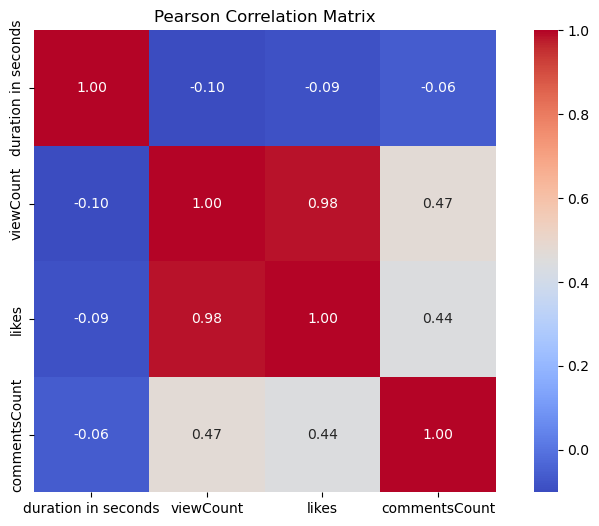

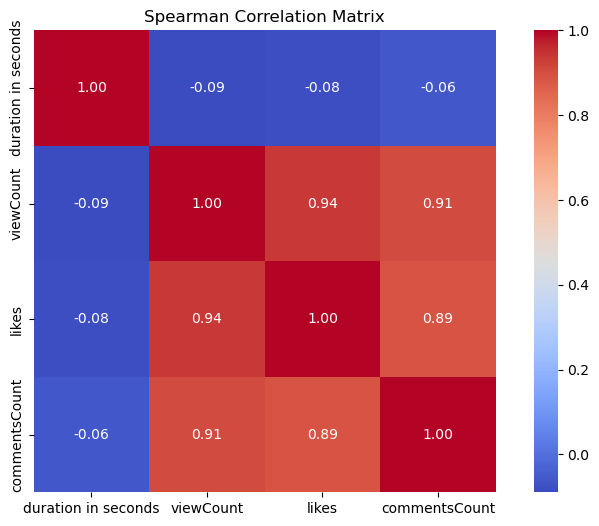

In [82]:
# Use subdf2 as df_corr2
df_corr2 = subdf2[['duration in seconds', 'viewCount', 'likes', 'commentsCount']]

pearson_corr = df_corr2.corr(method='pearson')
spearman_corr = df_corr2.corr(method='spearman')

# Plot Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plot Spearman correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()


### Correlation between video length and views likes & comments
There is no direction relation between duration and any of the given metrics

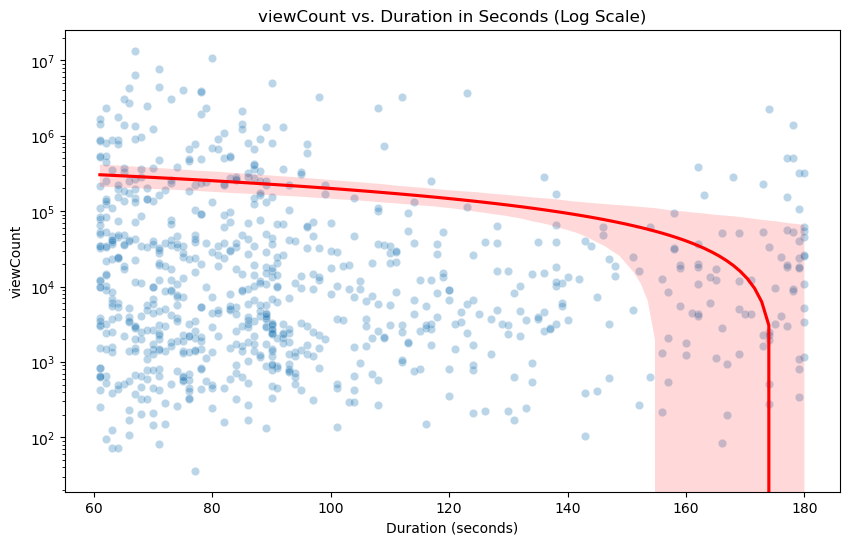

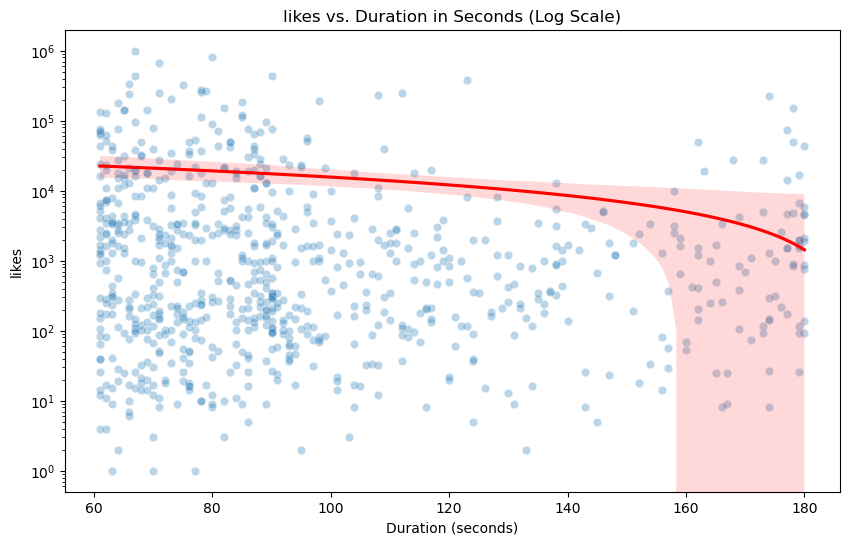

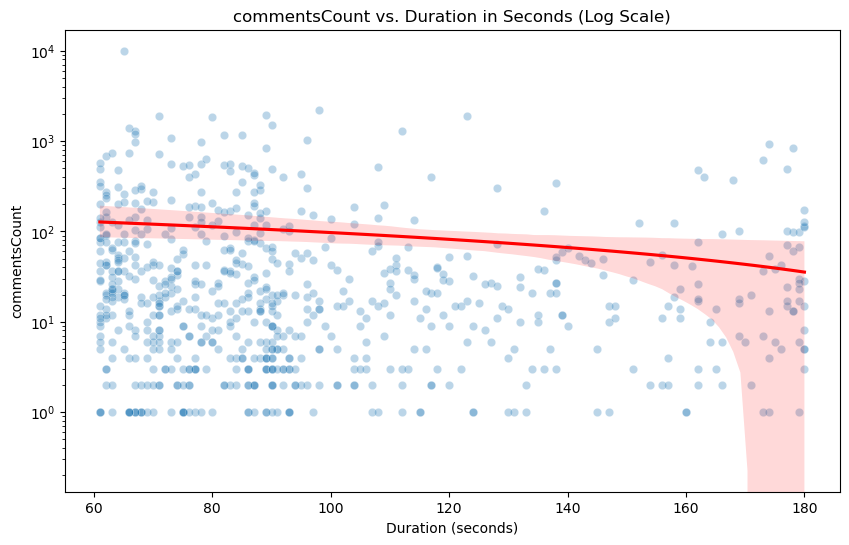

In [83]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='duration in seconds', y=metric, data=subdf2, alpha=0.3)
    sns.regplot(x='duration in seconds', y=metric, data=subdf2, scatter=False, color='red')
    plt.yscale('log')
    plt.title(f'{metric} vs. Duration in Seconds (Log Scale)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel(metric)
    plt.show()

### Engagement trend for longer duration videos
As the length of the video increases the engagement on the video drops, not too significantly but it does drop. 

In [84]:
# Filter the dataframe
filtered_df = df[df['datetime date'] >= '2024-10-15']

# Create duration bins
filtered_df['duration_bin'] = pd.cut(filtered_df['duration in seconds'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])

# Perform t-tests
for metric in metrics:
    for group1, group2 in [('Short', 'Medium'), ('Medium', 'Long'), ('Short', 'Long')]:
        t_stat, p_value = stats.ttest_ind(
            filtered_df.loc[filtered_df['duration_bin'] == group1, metric],
            filtered_df.loc[filtered_df['duration_bin'] == group2, metric],
            equal_var=False
        )
        print(f'T-test for {metric} ({group1} vs {group2}): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

T-test for viewCount (Short vs Medium): t-statistic = -5.4889, p-value = 0.0000
T-test for viewCount (Medium vs Long): t-statistic = 1.9103, p-value = 0.0562
T-test for viewCount (Short vs Long): t-statistic = -2.4881, p-value = 0.0130
T-test for likes (Short vs Medium): t-statistic = -6.9884, p-value = 0.0000
T-test for likes (Medium vs Long): t-statistic = 0.4696, p-value = 0.6387
T-test for likes (Short vs Long): t-statistic = -3.6614, p-value = 0.0003
T-test for commentsCount (Short vs Medium): t-statistic = -5.4502, p-value = 0.0000
T-test for commentsCount (Medium vs Long): t-statistic = 2.5913, p-value = 0.0096
T-test for commentsCount (Short vs Long): t-statistic = -3.3200, p-value = 0.0009


/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/2840796768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['duration_bin'] = pd.cut(filtered_df['duration in seconds'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])


### Comparison between different video lengths
- Short vs Medium : Shorter length videos have lesser views, likes and comments compared to Medium length videos
- Medium vs Long : Medium length videos have more views, likes and comments compared to Medium length videos
- Short vs Long : Shorter videos have less likes and comments but the difference is not significant


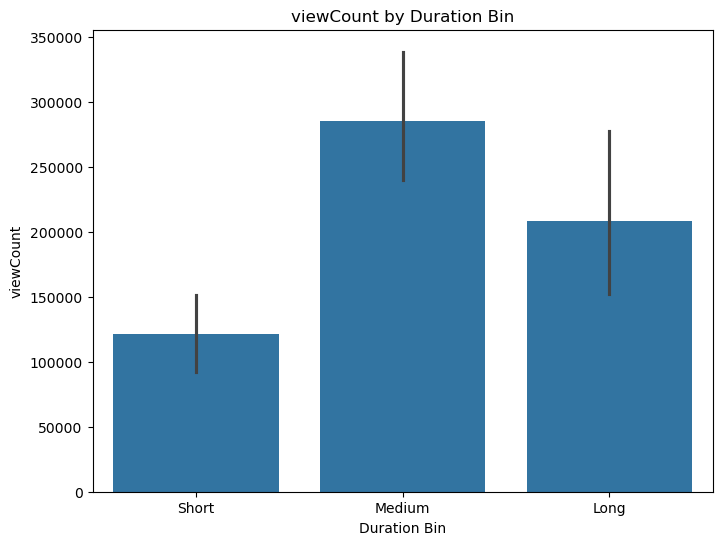

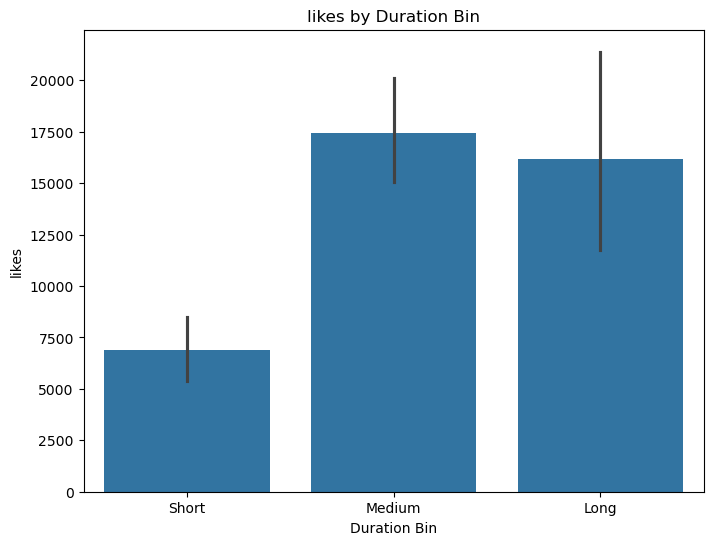

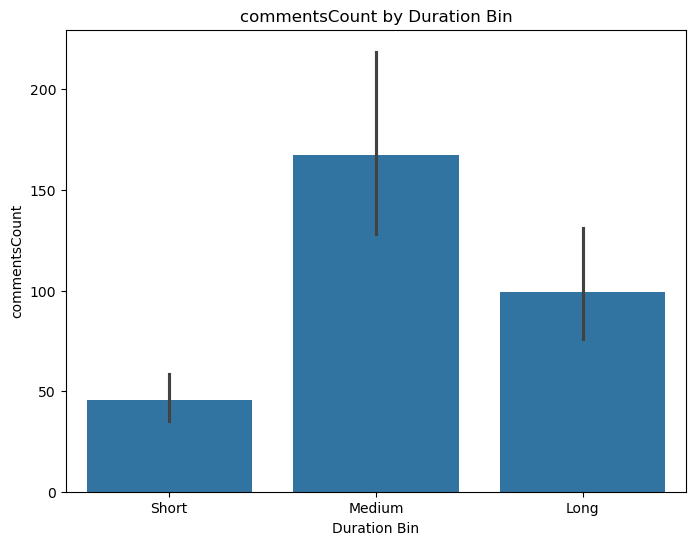

In [85]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='duration_bin', y=metric, data=filtered_df)
    plt.title(f'{metric} by Duration Bin')
    plt.xlabel('Duration Bin')
    plt.ylabel(metric)
    plt.show()

### Engagement trend by duration
From the above bar plots its evident that medium duration (30-60s) videos perform the best in terms of views, likes and comments.

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['datetime date'] = pd.to_datetime(df['datetime date'], errors='coerce')
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['hasAdinText'] = subdf['hasAdinText'].astype(int)
/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:5: SettingWithCopyWarning: 
A value is tryi

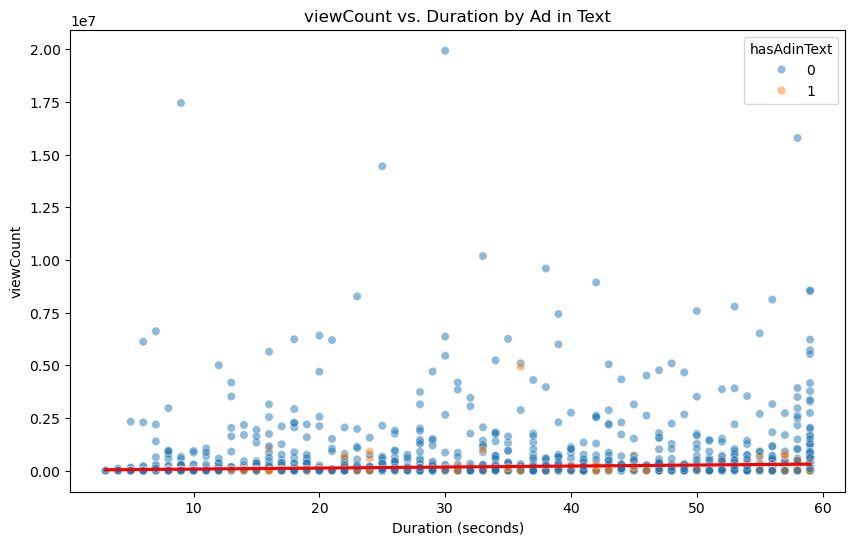

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration in seconds'] * X['hasAdinText']



Interaction Regression for viewCount:
                            OLS Regression Results                            
Dep. Variable:              viewCount   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     25.97
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.17e-16
Time:                        15:52:13   Log-Likelihood:                -71187.
No. Observations:                4728   AIC:                         1.424e+05
Df Residuals:                    4724   BIC:                         1.424e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

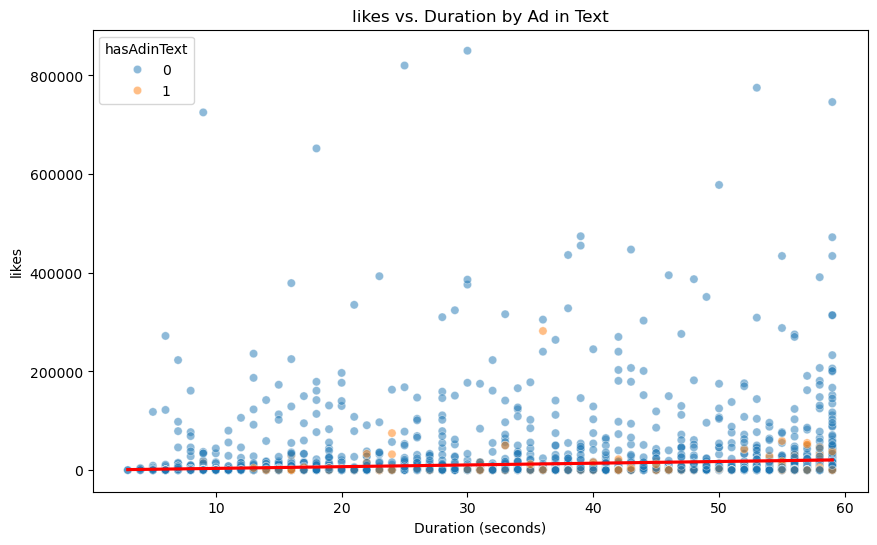

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration in seconds'] * X['hasAdinText']



Interaction Regression for likes:
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     38.44
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.55e-24
Time:                        15:52:13   Log-Likelihood:                -57553.
No. Observations:                4728   AIC:                         1.151e+05
Df Residuals:                    4724   BIC:                         1.151e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

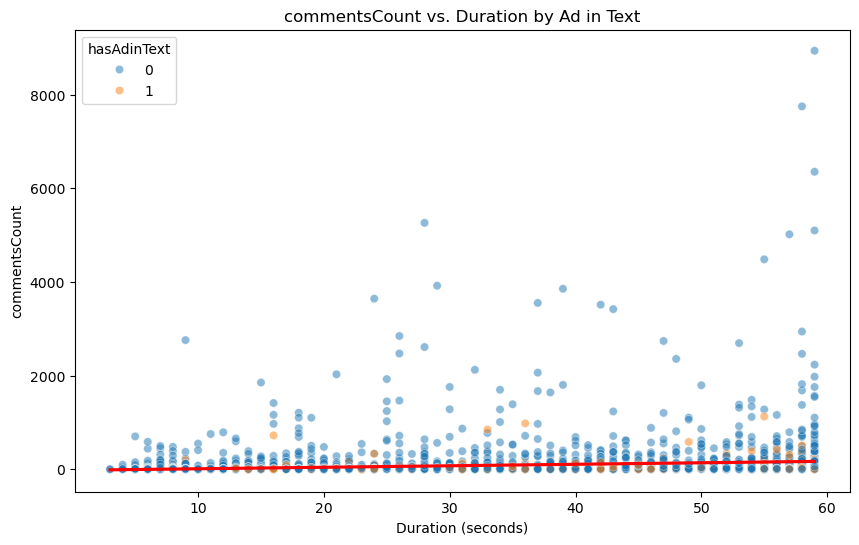


Interaction Regression for commentsCount:
                            OLS Regression Results                            
Dep. Variable:          commentsCount   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     50.39
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.72e-32
Time:                        15:52:14   Log-Likelihood:                -34277.
No. Observations:                4728   AIC:                         6.856e+04
Df Residuals:                    4724   BIC:                         6.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/var/folders/65/nrqfzh11273310hccvklmxb80000gn/T/ipykernel_60603/1693957496.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration_ad'] = X['duration in seconds'] * X['hasAdinText']


In [96]:
import statsmodels.api as sm    

subdf['datetime date'] = pd.to_datetime(df['datetime date'], errors='coerce')
subdf['hasAdinText'] = subdf['hasAdinText'].astype(int)
subdf['hasAdinTitle'] = subdf['hasAdinTitle'].astype(int)
# Filter the data
filtered_subdf = subdf[(subdf['datetime date'] >= '2024-10-15') & 
                       (subdf['duration in seconds'] < 60) & 
                       (subdf['viewCount'] < 0.2e8) & 
                       (subdf['likes'] < 1e6) & 
                       (subdf['commentsCount'] < 10000)]

for metric in ['viewCount', 'likes', 'commentsCount']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='duration in seconds', y=metric, hue='hasAdinText', data=filtered_subdf, alpha=0.5)
    sns.regplot(x='duration in seconds', y=metric, data=filtered_subdf, scatter=False, color='red')
    # sns.regplot(x='hasAdinText', y=metric, data=filtered_subdf, scatter=False, color='green')
    plt.title(f'{metric} vs. Duration by Ad in Text')
    plt.xlabel('Duration (seconds)')
    plt.ylabel(metric)
    # plt.yscale('log')
    plt.show()

    # Regression with interaction
    X = filtered_subdf[['duration in seconds', 'hasAdinText']]
    X['duration_ad'] = X['duration in seconds'] * X['hasAdinText']
    X = sm.add_constant(X)
    y = filtered_subdf[metric]
    model = sm.OLS(y, X).fit()
    print(f"\nInteraction Regression for {metric}:")
    print(model.summary())

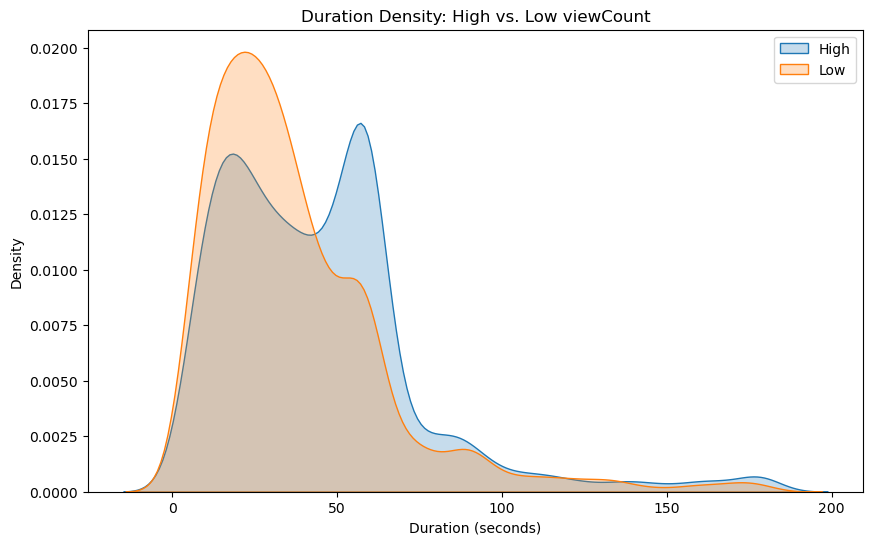

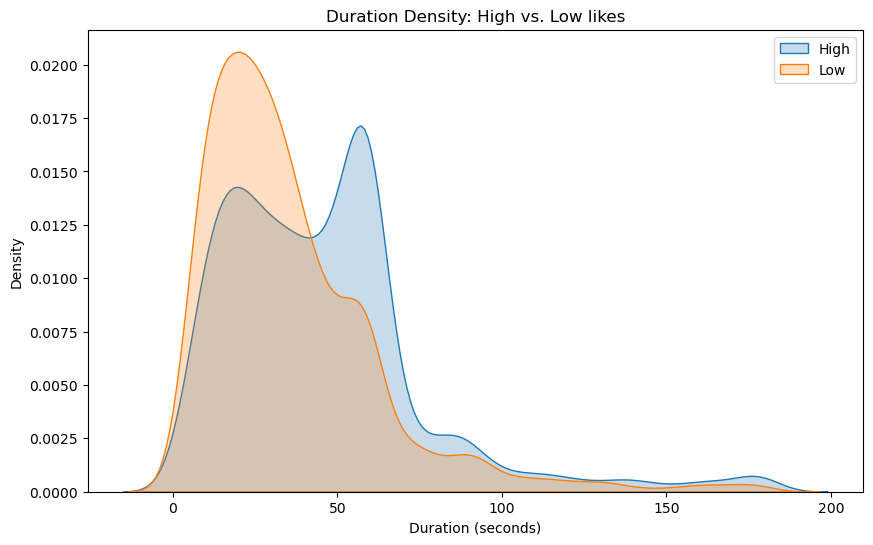

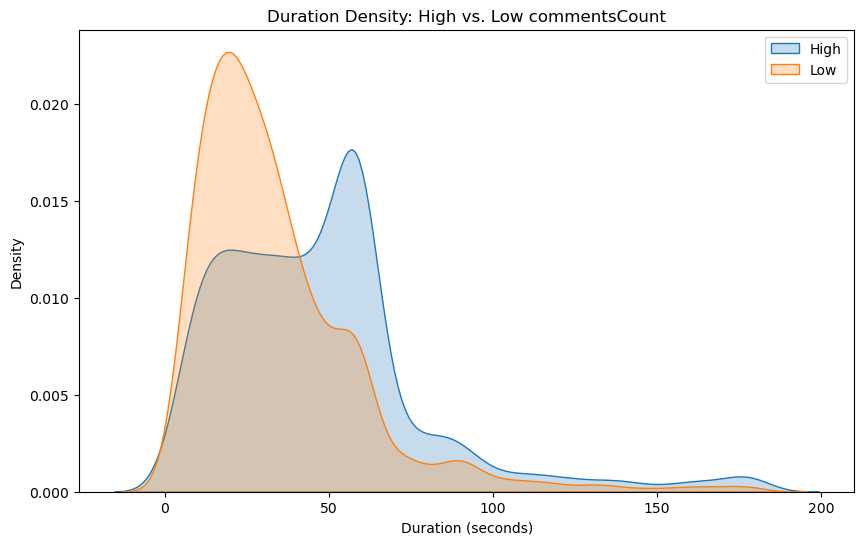

In [97]:
for metric in ['viewCount', 'likes', 'commentsCount']:
    median_val = filtered_df[metric].median()
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=filtered_df[filtered_df[metric] > median_val], x='duration in seconds', label='High', fill=True)
    sns.kdeplot(data=filtered_df[filtered_df[metric] <= median_val], x='duration in seconds', label='Low', fill=True)
    plt.title(f'Duration Density: High vs. Low {metric}')
    plt.xlabel('Duration (seconds)')
    plt.legend()
    plt.show()